# GLM 負の二項分布 単回帰

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
filepath = '../../../../../data/processed/df_filtered_5years.xlsx'
df = pd.read_excel(filepath).drop(columns='special')
df['log_income'] = np.log(df['income'])
df = df.dropna()
df.head()

,island,year,island_id,region_code,region_name,prefecture_code,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,prefecture_name,area_km2,distance_m,log_income
5,島後,2005,62,32528,隠岐の島町,32,17259.0,0.0,0.0,0.0,0.0,0.0,0.0,2030.888121,島根県,241.53,67840.0,7.616228
6,島後,2010,62,32528,隠岐の島町,32,15930.0,0.0,0.0,0.0,0.0,0.0,0.0,1725.990958,島根県,241.53,67840.0,7.453557
7,島後,2015,62,32528,隠岐の島町,32,14901.0,0.0,0.0,0.0,0.0,0.0,0.0,1613.531700,島根県,241.53,67840.0,7.386181
8,島後,2020,62,32528,隠岐の島町,32,13882.0,0.0,0.0,0.0,0.0,0.0,0.0,1686.173400,島根県,241.53,67840.0,7.430217
10,中ノ島,1985,63,32525,海士町,32,3339.0,0.0,0.0,0.0,0.0,0.0,0.0,363.212405,島根県,32.29,49730.0,5.894988


In [12]:
# 過分散パラメータ
population = df['population']
mean_population = np.mean(population)
var_population = np.var(population)

alpha = (var_population - mean_population) / mean_population**2

In [13]:
y = df['population']
X = df['dummy_after_bridge_opened']
X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=alpha))
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             population   No. Observations:                  830
Model:                            GLM   Df Residuals:                      828
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6691.2
Date:                Sat, 19 Oct 2024   Deviance:                       327.35
Time:                        14:26:53   Pearson chi2:                     814.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.08066
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## 残差分析

In [14]:
residuals = results.resid_response

In [16]:
# 変数と残差の相関
corr_bridge = np.corrcoef(df['dummy_after_bridge_opened'], residuals)[0, 1]
coor_population = np.corrcoef(df['population'], residuals)[0, 1]

print(f'coor between bridge and residuals: {corr_bridge:.3f}')
print(f'coor between population and residuals: {coor_population:.3f}')

coor between bridge and residuals: -0.000
coor between population and residuals: 0.943


### 残差プロット

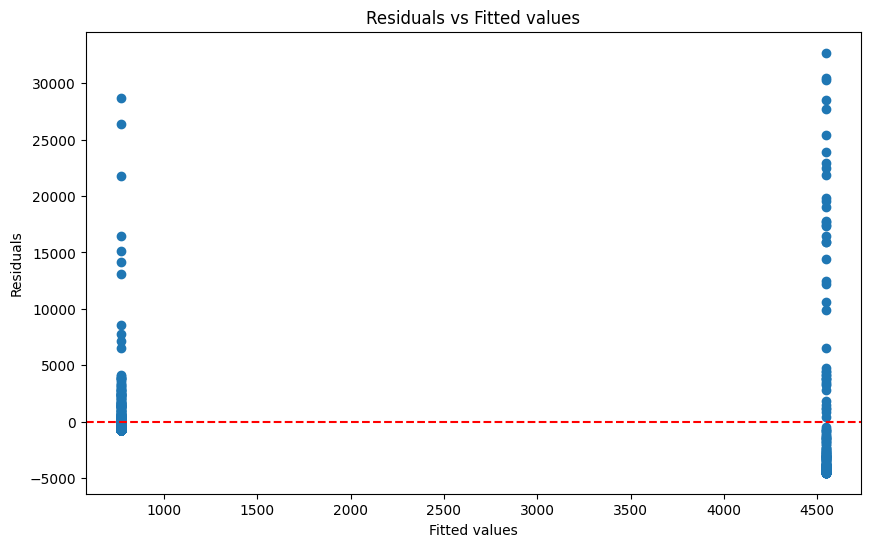

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

### 残差ヒストグラム

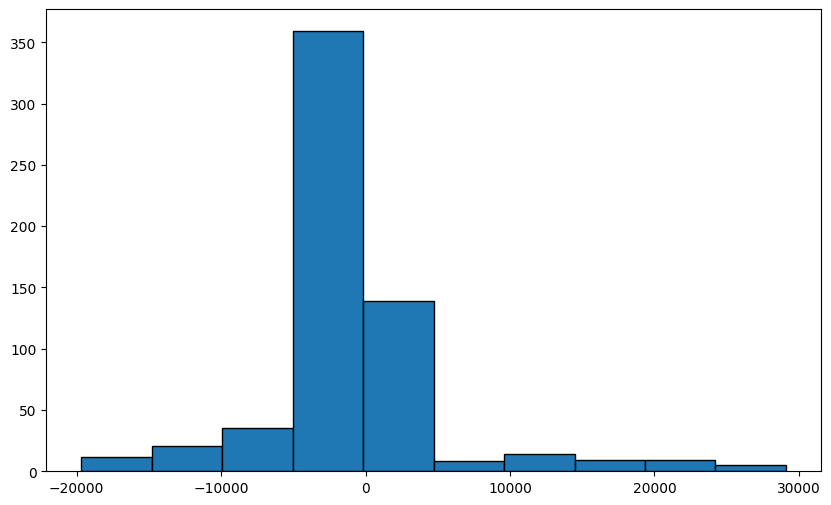

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, edgecolor='black')
plt.show()